In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import langid
from tabulate import tabulate
import langcodes

# Load Dataset

In [20]:
df = pd.read_parquet("../raw datasets/track_raw.parquet")
df.head(5)

,track_idx,track_uri,album_name,album_idx,artist_name,artist_idx,duration_ms,track_name,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lyrics
0,0,spotify:track:000DfZJww8KiixTKuk9usJ,The Change I'm Seeking,78824,Mike Love,20091,357573,Earthlings,0.631,0.513,...,-6.376,1.0,0.0293,0.366000,0.000004,0.1090,0.307,120.365,4.0,I just can't take no more\n I gotta get out of...
1,1,spotify:track:000GjfnQc7ggBayDiy1sLW,Y las Mariposas,19030,El Poder De Zacatecas,26382,140360,Abeja Miope,0.913,0.748,...,-3.274,1.0,0.0428,0.074500,0.000956,0.0403,0.864,114.143,4.0,None
2,2,spotify:track:000JCyEkMFumqCZQJAORiQ,Enough Is Enough,80563,Nipsey Hussle,1633,207124,California Water,0.795,0.874,...,-4.523,1.0,0.2100,0.064600,0.000000,0.3410,0.483,132.966,4.0,None
3,3,spotify:track:000VZqvXwT0YNqKk7iG2GS,Dear Youth,118169,The Ghost Inside,47069,256478,Mercy,0.444,0.991,...,-4.167,1.0,0.1330,0.000085,0.000084,0.1200,0.106,124.016,4.0,For whom the bell tolls\n There's a hurricane ...
4,4,spotify:track:000uWezkHfg6DbUPf2eDFO,Dancehall Days,55985,The Beautiful Girls,4863,321679,Me I Disconnect From You,0.714,0.635,...,-10.769,1.0,0.0299,0.001940,0.259000,0.0839,0.360,134.007,4.0,None


# Check Data Types

In [21]:
print(df.dtypes)

track_idx             int64
track_uri            object
album_name           object
album_idx             int64
artist_name          object
artist_idx            int64
duration_ms           int64
track_name           object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
lyrics               object
dtype: object


# Statistical Summary of Numerical Columns

In [22]:
print(df.describe())

           track_idx      album_idx     artist_idx   duration_ms  \
count  252236.000000  252236.000000  252236.000000  2.522360e+05   
mean   126117.500000   64960.924479   27115.928230  2.377359e+05   
std     72814.405587   37490.235271   15784.973095  9.686570e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%     63058.750000   32632.000000   13564.000000  1.920000e+05   
50%    126117.500000   64977.500000   26854.000000  2.236000e+05   
75%    189176.250000   97402.250000   40987.000000  2.646930e+05   
max    252235.000000  129877.000000   54455.000000  7.575928e+06   

        danceability         energy            key       loudness  \
count  252209.000000  252209.000000  252209.000000  252209.000000   
mean        0.579452       0.622506       5.278563      -8.141255   
std         0.170929       0.234978       3.581118       4.427018   
min         0.000000       0.000000       0.000000     -60.000000   
25%         0.468000       0.466000       

# Check Null Values in each column

In [23]:
print(df.isnull().sum())  

track_idx               0
track_uri               0
album_name              0
album_idx               0
artist_name             0
artist_idx              0
duration_ms             0
track_name              1
danceability           27
energy                 27
key                    27
loudness               27
mode                   27
speechiness            27
acousticness           27
instrumentalness       27
liveness               27
valence                27
tempo                  27
time_signature         27
lyrics              65006
dtype: int64


# Handling Missing Values (Part 1)

### track_name

Only had 1 missing track_name, so we went to manually search on the track name using the track_uri provided

In [24]:
df.loc[df['track_name'].isnull(), 'track_name'] = 'None'

# Convert Units

'duration_ms' is the duration of each track. The units are currently in terms of milliseconds, and for better representation, we would be converting it to seconds, and rounding it to the nearest seconds.

In [25]:
df['duration'] = df['duration_ms'] // 1000
df = df.drop(columns=['duration_ms']) 

# Check Distribution for columns & Outliers

### Identify Columns that are numerical & categorical

In [26]:
numerical_col = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
categorical_col = ['time_signature', 'key', 'mode']

### Histogram for Continuous

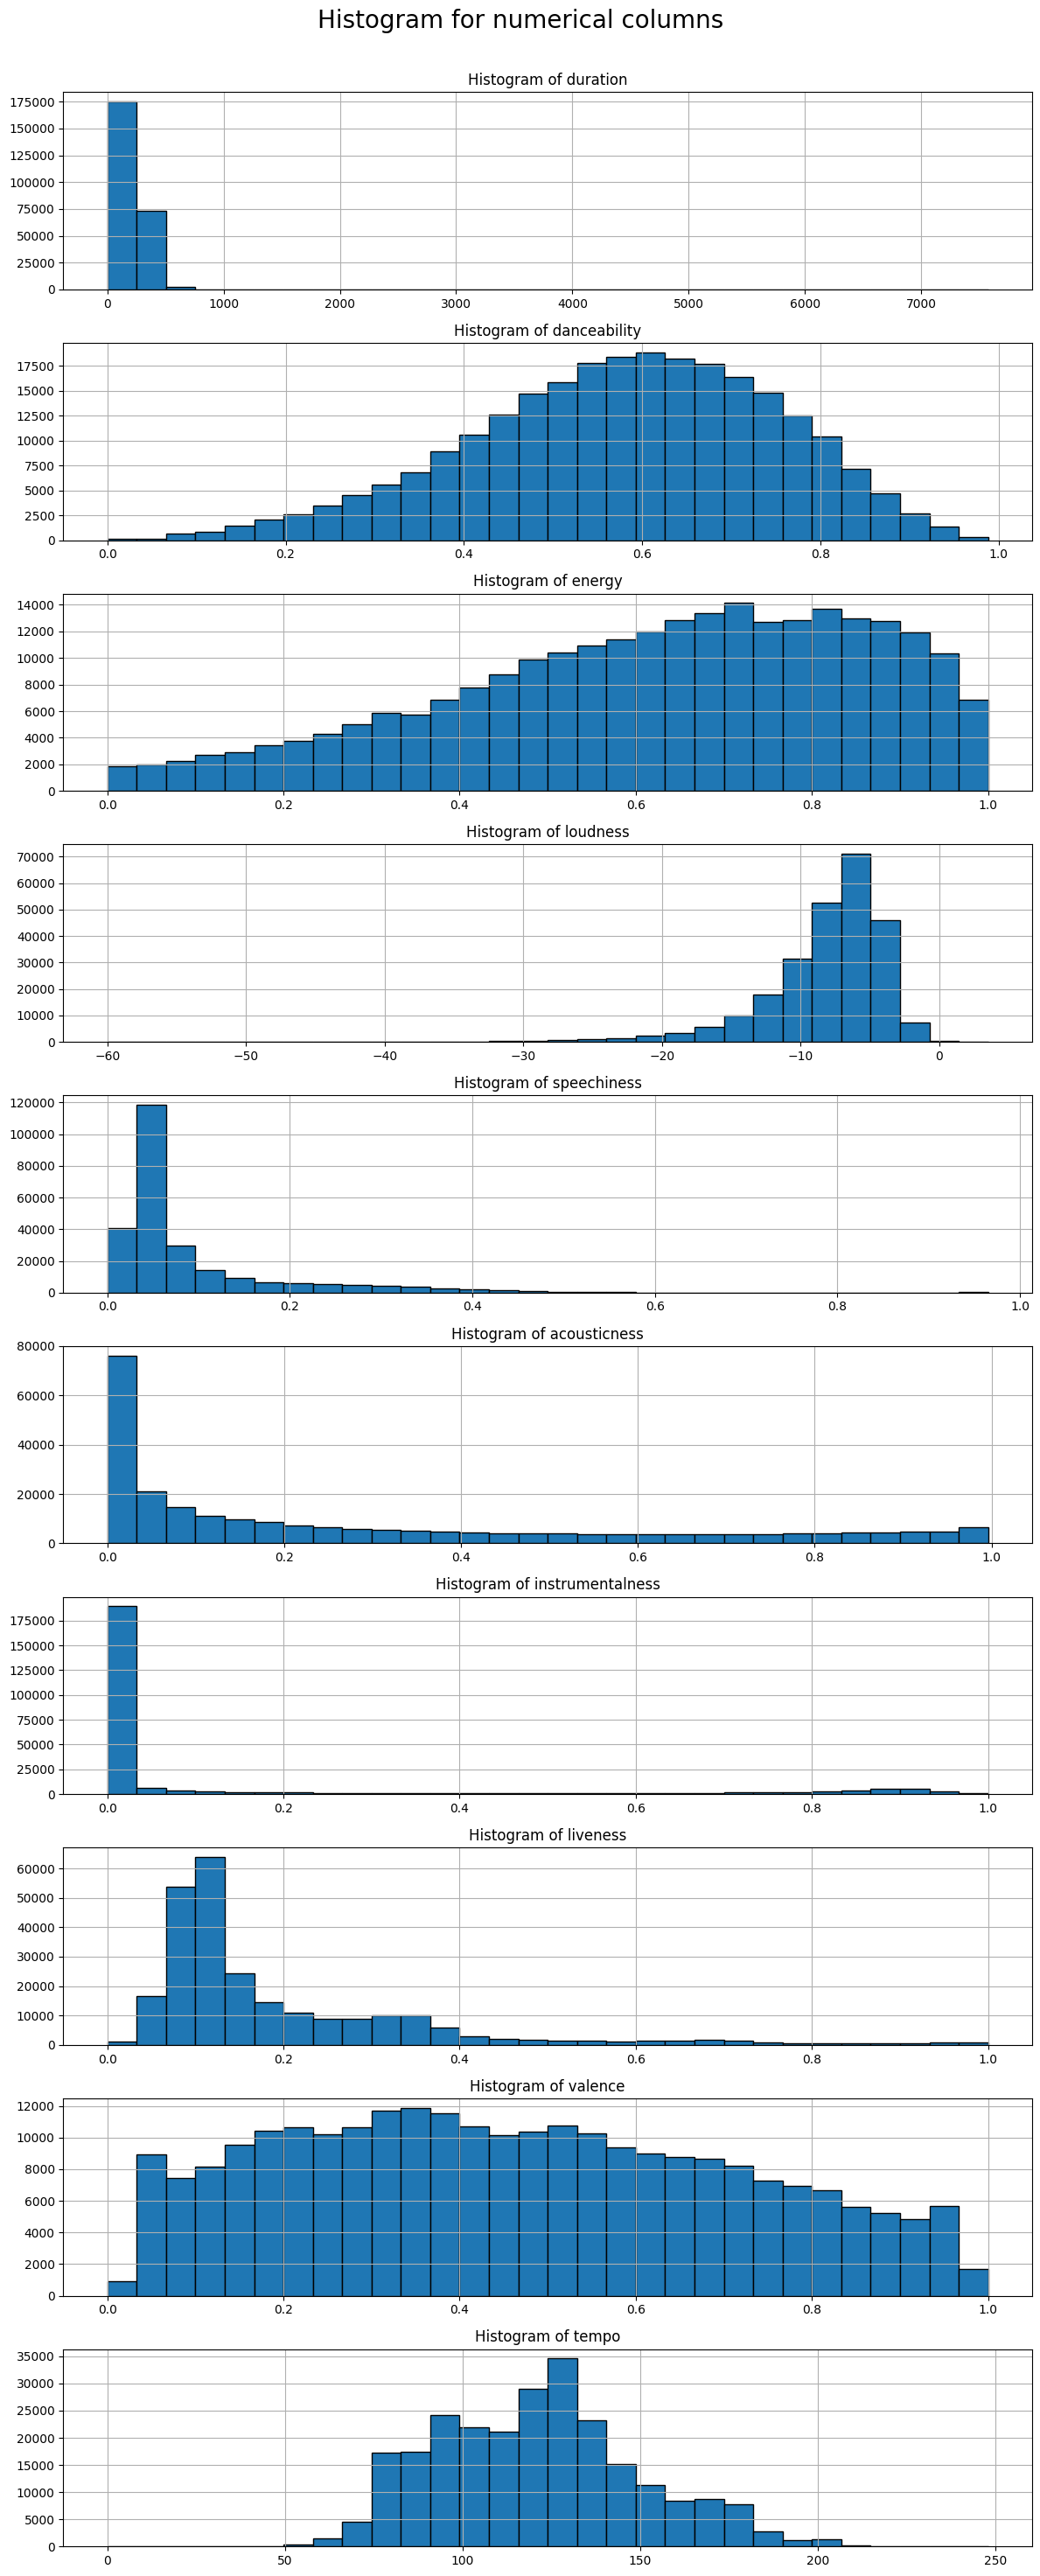

In [27]:
num_cols = df[numerical_col]

plt.figure(figsize=(12, len(num_cols.columns) * 3))

for i, col in enumerate(num_cols.columns, 1):
    plt.subplot(len(num_cols.columns), 1, i)  
    df[col].hist(bins=30, edgecolor='black')  
    plt.title(f'Histogram of {col}')  

plt.suptitle("Histogram for numerical columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

### Barplots for Categorical

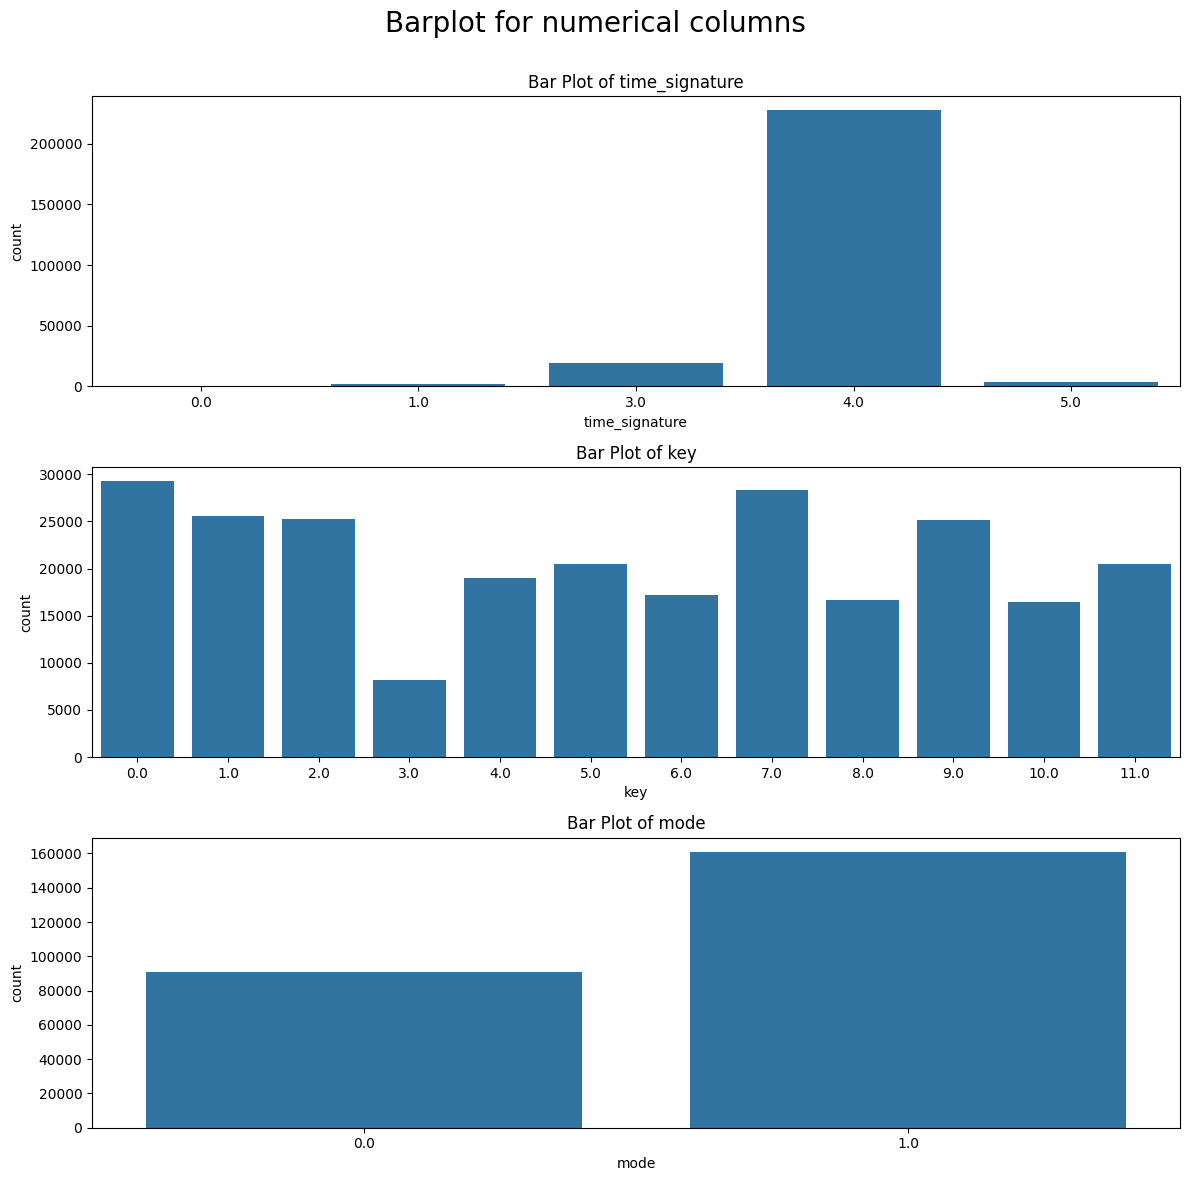

In [28]:
plt.figure(figsize=(12, len(categorical_col) * 4))

for i, col in enumerate(categorical_col, 1):
    plt.subplot(len(categorical_col), 1, i) 
    sns.countplot(data=df, x=col)  
    plt.title(f'Bar Plot of {col}')

plt.suptitle("Barplot for numerical columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

### Boxplots for Numerical

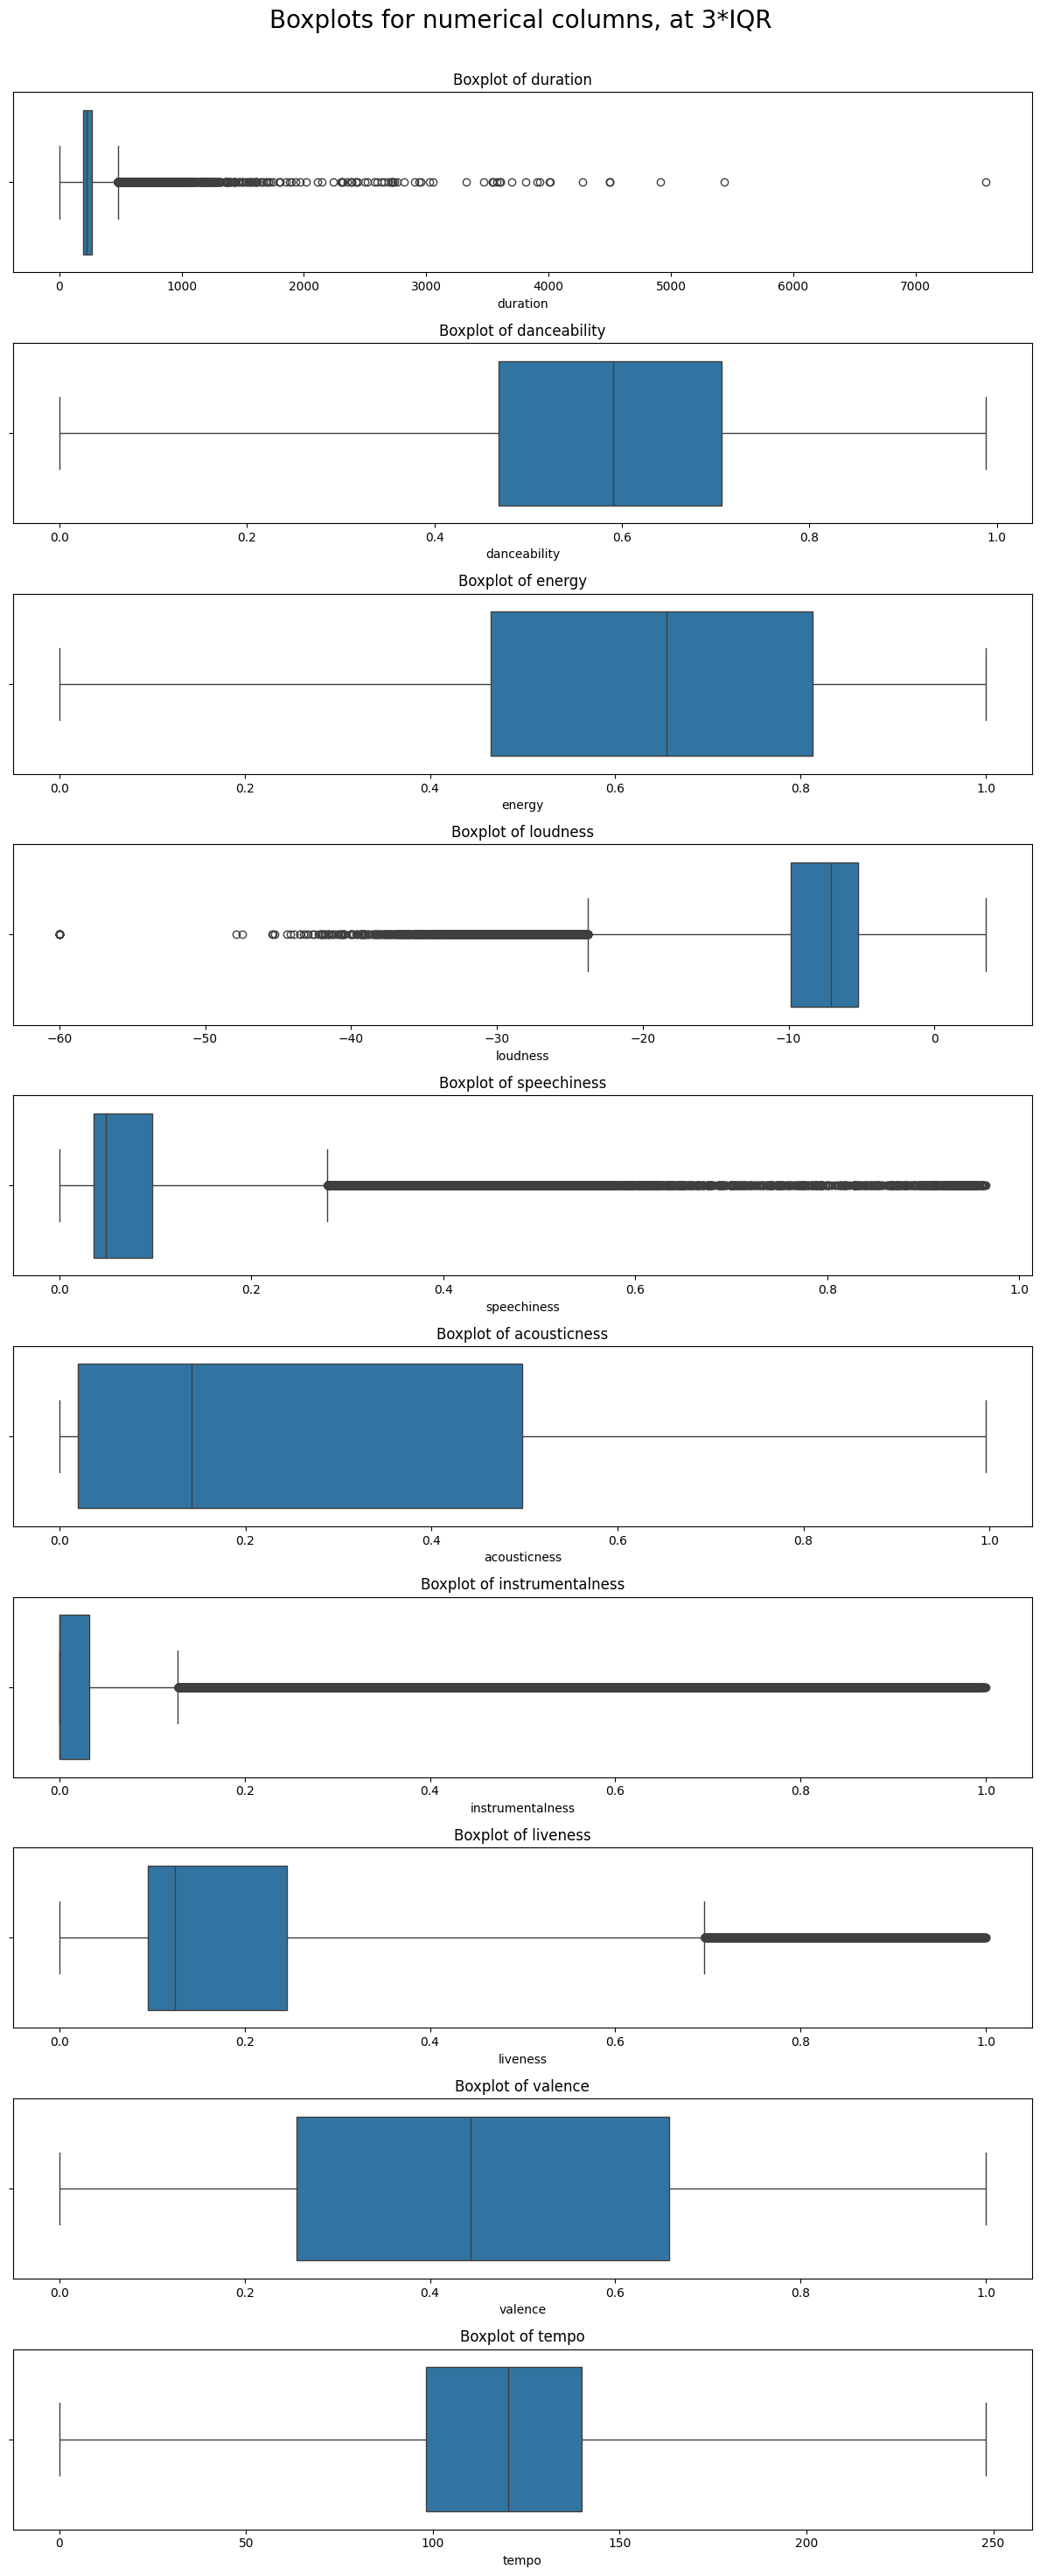

In [29]:
plt.figure(figsize=(12, len(num_cols.columns) * 3))

for i, col in enumerate(num_cols.columns, 1):
    plt.subplot(len(num_cols.columns), 1, i)  
    sns.boxplot(x=num_cols[col], whis=3)  
    plt.title(f'Boxplot of {col}')  

plt.suptitle("Boxplots for numerical columns, at 3*IQR", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

As seen from the visualizations, there are data points that lies outside the 3*IQR. 

However, there is a large number of "outliers", and these are likely due to systematic reasons of the musical attributes of the tracks. These "outliers" are likely due to the inherent characteristics of the tracks. Furthermore, each track is unique, and extreme values in attributes like loudness or energy can represent intentional artistic choices rather than errors.

As such, we are not going to handle these outliers, as they reflect genuine data points that are important for understanding the diversity of musical tracks

# Handling Missing Values (Part 2)

### audio features

As seen previously in 'Handling Missing Values (Part 1)', there are 27 tracks with missing audio features, out of 252,236 tracks. This is a very small proportion of missing data.

As seen in the data visualization for the audio features: 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'key', 'mode', the distribution is not symmetrical. 

As such, we would replace missing values with the median instead.

In [30]:
numerical_audio_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
categorical_audio_cols = ['time_signature', 'key', 'mode']

numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_audio_cols] = numerical_imputer.fit_transform(df[numerical_audio_cols])

df[categorical_audio_cols] = categorical_imputer.fit_transform(df[categorical_audio_cols])

print(df.isnull().sum())  

track_idx               0
track_uri               0
album_name              0
album_idx               0
artist_name             0
artist_idx              0
track_name              0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
lyrics              65006
duration                0
dtype: int64


# Lyrics Data Cleaning

When extracting lyrics from various datasets, some tracks were filled up as [Instrumental], [No Lyrics], or for classicals, it was filled up with a numerical value and some tracks also had lyrics in foreign languages such as Korean, Mandarin, Russian, etc.

We are first going to identify the tracks with lyrics as [Instrumental], [No Lyrics].

In [31]:
instrumental_rows = df[df['lyrics'] == '[Instrumental]']
print("Number of songs with lyrics filled as '[Instrumental]':", len(instrumental_rows))

no_lyrics_rows = df[df['lyrics'] == '[No Lyrics]']
print("Number of songs with lyrics filled as '[No Lyrics]':", len(no_lyrics_rows))

Number of songs with lyrics filled as '[Instrumental]': 10137
Number of songs with lyrics filled as '[No Lyrics]': 15


Next, we are first going to identify the tracks with lyrics as a number.

In [32]:
numeric_lyrics = df[df['lyrics'].str.match(r'^-?\d+$', na=False)]
print("Number of songs with lyrics filled as a number:", len(numeric_lyrics))

Number of songs with lyrics filled as a number: 1198


However, these songs having placeholders for lyrics is important, as these songs itself does not have lyrics. As such, we will be using another placeholder, 'No Lyrics'

In [33]:
df['lyrics'] = df['lyrics'].replace('[Instrumental]', 'No Lyrics')
df['lyrics'] = df['lyrics'].replace('[No Lyrics]', 'No Lyrics')
df['lyrics'] = df['lyrics'].replace(r'^-?\d+$', 'No Lyrics', regex=True)

Some lyrics contain [Intro], [Chorus], [Verse 1] in the lyrics, and we will use regular expression to remove these.

In [34]:
df['lyrics'] = df['lyrics'].replace(r'[\[\(].*?[\]\)]', '', regex=True)

### Detecting Languages of Lyrics

There are many tracks with lyrics in foreign languages, and we will classify how many tracks there are per each language, using the library 'langid'

In [35]:
valid_lyrics_mask = df['lyrics'].notna() & (df['lyrics'] != 'No Lyrics')

lyrics_snippets = df.loc[valid_lyrics_mask, 'lyrics'].str.split(n=10).str[:10].str.join(' ')

lyrics_languages = lyrics_snippets.map(lambda text: langid.classify(text)[0])

language_counts = lyrics_languages.value_counts()

print(language_counts)


lyrics
en    154538
es      8068
fr      1340
ko      1130
pt      1029
       ...  
ps         2
hy         1
mn         1
kk         1
ky         1
Name: count, Length: 87, dtype: int64


Presenting the counts in a Table with Proportions

In [36]:
def get_language_name(lang_code):
    try:
        language = langcodes.Language.get(lang_code)
        return language.display_name()
    except:
        return lang_code  

top_20_languages = language_counts.nlargest(20)
top_20_df = top_20_languages.reset_index()
top_20_df.columns = ['Language', 'Count']

total_count = top_20_df['Count'].sum()
top_20_df['Proportion (%)'] = round((top_20_df['Count'] / total_count) * 100, 2)

top_20_df['Language'] = top_20_df['Language'].apply(get_language_name)

print("Top 20 Languages with the Most Instances in Lyrics")
print(tabulate(top_20_df, headers='keys', tablefmt='pretty', showindex=False))

Top 20 Languages with the Most Instances in Lyrics
+------------+--------+----------------+
|  Language  | Count  | Proportion (%) |
+------------+--------+----------------+
|  English   | 154538 |     89.74      |
|  Spanish   |  8068  |      4.69      |
|   French   |  1340  |      0.78      |
|   Korean   |  1130  |      0.66      |
| Portuguese |  1029  |      0.6       |
|   German   |  820   |      0.48      |
| Indonesian |  694   |      0.4       |
|  Italian   |  685   |      0.4       |
|  Filipino  |  556   |      0.32      |
|   Dutch    |  441   |      0.26      |
|   Malay    |  432   |      0.25      |
|  Swahili   |  350   |      0.2       |
|  Finnish   |  325   |      0.19      |
|  Chinese   |  318   |      0.18      |
|  Galician  |  266   |      0.15      |
|  Catalan   |  255   |      0.15      |
| Afrikaans  |  251   |      0.15      |
|  Swedish   |  236   |      0.14      |
|   Welsh    |  235   |      0.14      |
|   Polish   |  228   |      0.13      |
+-----

As expected, most of the songs are in English, followed by Spanish which is the second highest.

As we would be doing sentiment analysis on the lyrics, it is important to ensure that the languages of the lyrics are accounted for. We would thus be using multilingual sentiment models, to prevent having to translate using APIs.

# Handling Missing Values (Part 3)

Currently, there are about 75,000 tracks with unavailable lyrics, either due to the song itself not having any lyrics in the music, or due to unavailable data.

It accounts to about 30% missing data, and we will handle these missing data after we conduct sentiment analysis. We will use imputation methods, such as filling it up by the average sentiment of other songs by the same artist, or just giving a neutral sentiment score.

# Save Dataset

In [37]:
df_sorted = df.sort_values(by='track_idx', ascending=True)
df_sorted.to_parquet('../cleaned dataset/track_cleaned.parquet')